<a href="https://colab.research.google.com/github/SaikrishnaDandamudi/BrainStation-Capstone-Project/blob/master/Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE LIBRARIES

In [1]:
# This library is needed to plot the roc_curve for the model
# Scikit Plot Install
!pip install scikit-plot

In [2]:
#importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn import metrics
import tensorflow as tf

# LOADING THE DATASET AND EXTRACTING

The dataset will be made available on Google Drive and on the github repo.

In [3]:
#Unzipping the folder with images
!unzip Multi_Class_Classfication.zip -d Multi_Class_Classfication




Archive:  Multi_Class_Classfication.zip
   creating: Multi_Class_Classfication/test/
  inflating: Multi_Class_Classfication/test/.DS_Store  
   creating: Multi_Class_Classfication/test/COV-19/
  inflating: Multi_Class_Classfication/test/COV-19/9fdd3c3032296fd04d2cad5d9070d4_jumbo.jpeg  
  inflating: Multi_Class_Classfication/test/COV-19/16663_1_1.jpg  
  inflating: Multi_Class_Classfication/test/COV-19/b0f1684d1ee90dc09deef015e29dae_jumbo.jpeg  
  inflating: Multi_Class_Classfication/test/COV-19/nejmoa2001191_f5-PA.jpeg  
  inflating: Multi_Class_Classfication/test/COV-19/7-fatal-covid19.jpg  
  inflating: Multi_Class_Classfication/test/COV-19/covid-19-pneumonia-14-PA.png  
  inflating: Multi_Class_Classfication/test/COV-19/10.1016-slash-j.anl.2020.04.002-a.png  
  inflating: Multi_Class_Classfication/test/COV-19/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: Multi_Class_Classfication/test/COV-19/covid-19-pneumonia-44-day-0.jpeg  
  inflating: Mul

Now that the data is downloaded to Colab, we need to specify the folders (i.e. Train and Test)

In [4]:
# Creating the file path for test and train
TRAIN_FILE_PATH = '/content/Multi_Class_Classfication/train'
TEST_FILE_PATH = '/content/Multi_Class_Classfication/test'

Now that we have the data avaiable, we will start with modeling.


# CNN MODELING - Multi Class Classification

With the CNN modeling, we will employ a layered architecture approach to identify the patterns in the images.

In [5]:
# Intantiating the Sequential Model
cnn_model_multi = Sequential()

# We have a 32 filter in the first layer to feature extraction and a kernal size of (3x3) as a standard
cnn_model_multi.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

cnn_model_multi.add(Conv2D(64,(3,3),activation="relu"))
cnn_model_multi.add(MaxPooling2D(pool_size = (2,2)))
cnn_model_multi.add(Dropout(0.25))

cnn_model_multi.add(Conv2D(64,(3,3),activation="relu"))
cnn_model_multi.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_multi.add(Dropout(0.25))

cnn_model_multi.add(Conv2D(128,(3,3),activation="relu"))
cnn_model_multi.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_multi.add(Dropout(0.25))

cnn_model_multi.add(Conv2D(128,(3,3),activation="relu"))
cnn_model_multi.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_multi.add(Dropout(0.25))

cnn_model_multi.add(Flatten())
cnn_model_multi.add(Dense(64,activation="relu"))
cnn_model_multi.add(Dropout(0.5))

cnn_model_multi.add(Dense(3,activation="softmax"))

cnn_model_multi.compile(loss=keras.losses.categorical_crossentropy,optimizer = "adam",metrics=["accuracy"])

# MODEL ARCHITECTURE

We will adapt the similar architecture structure as Binary classification except the output layer will 3 since the model needs to predict (COVID vs. PNEUMONIA vs. NORMAL)

In [6]:
#Generating the model summary
cnn_model_multi.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

We now have established a CNN model for Multi Class Classification

# MODEL TRAINING

Similar to the process of Binary Classificatio and also since the images (CXR) are of a different shape, we will perform data augmentation.

## DATA AUGMENTATION

### Train Data Augmentation

In [7]:
# using the keras image data generator to augment the data
train_data_gen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_data_gen = image.ImageDataGenerator(rescale = 1./255)

In [8]:
# augmenting the train set images
train_image_gen = train_data_gen.flow_from_directory(
    TRAIN_FILE_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 417 images belonging to 3 classes.


In [9]:
#Checking the classes of the images in the train data set
train_image_gen.class_indices

{'COV-19': 0, 'NORMAL': 1, 'PNEMONIA': 2}

### Test Data Augmentation

In [10]:
# augmenting the train set images
test_image_gen = test_data_gen.flow_from_directory(
    TEST_FILE_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 123 images belonging to 3 classes.


In [11]:
#Checking the classes of the images in the test data set
test_image_gen.class_indices

{'COV-19': 0, 'NORMAL': 1, 'PNEMONIA': 2}

In [12]:
# print(len(train_image_gen))
# print(len(test_image_gen))

In [13]:
# STEP_SIZE_TRAIN=train_image_gen.n//train_image_gen.batch_size
# STEP_SIZE_VALID=test_image_gen.n//test_image_gen.batch_size

In [14]:
epochs = 50
batch_size = 32
num_of_train_samples = 417
num_of_test_samples = 123

In [15]:
#instantiating the model
Multi_Mod = cnn_model_multi.fit_generator(
    train_image_gen,
    steps_per_epoch = num_of_train_samples // batch_size,
    epochs = epochs,
    validation_data = test_image_gen,
    validation_steps = num_of_test_samples // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 116s 9s/step - loss: 1.2161 - accuracy: 0.3584 - val_loss: 1.0987 - val_accuracy: 0.1458
Epoch 2/50
13/13 [==============================] - 110s 8s/step - loss: 1.0881 - accuracy: 0.3636 - val_loss: 1.0806 - val_accuracy: 0.2188
Epoch 3/50
13/13 [==============================] - 110s 8s/step - loss: 1.0095 - accuracy: 0.5065 - val_loss: 0.9163 - val_accuracy: 0.8021
Epoch 4/50
13/13 [==============================] - 110s 8s/step - loss: 0.8492 - accuracy: 0.5974 - val_loss: 0.6675 - val_accuracy: 0.8333
Epoch 5/50
13/13 [==============================] - 110s 8s/step - loss: 0.8146 - accuracy: 0.6130 - val_loss: 0.5873 - val_accuracy: 0.9062
Epoch 6/50
13/13 [==============================] - 114s 9s/step - loss: 0.7061 - accuracy: 0.6883 - val_loss: 0.5318 - val_accuracy: 0.8958
Epoch 7/50
13/13 [==============================] - 118s 9s/step - loss: 0.645

# EVALUATING THE MODEL RESULTS

In [16]:
#Saving the above model
cnn_model_multi.save("Covid_19_Mulitclass.h5")

In [17]:
# Train dataset: results
cnn_model_multi.evaluate_generator(train_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.2466953545808792, 0.9112709760665894]

The training accuracy of our model is at 91%

In [18]:
# Test dataset: results
cnn_model_multi.evaluate_generator(test_image_gen)

[0.2107122540473938, 0.9268292784690857]

The validation accuracy of our model is at 92.6%.

In [19]:
Model_Eval = Multi_Mod
print(Multi_Mod.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


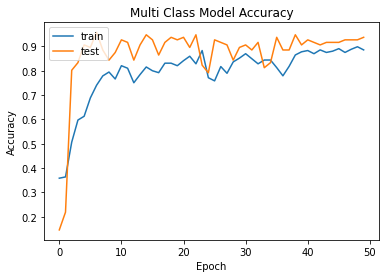

In [20]:
# Plotting Model Accuracy - Multi Class
plt.plot(Model_Eval.history['accuracy'])
plt.plot(Model_Eval.history['val_accuracy'])
plt.title('Multi Class Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Multi_class_Acc-50Epochs.png')
plt.show()

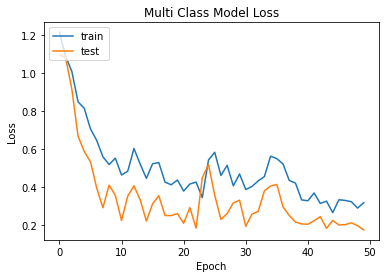

In [21]:
# Plotting Model Loss - Multi Class
plt.plot(Model_Eval.history['loss'])
plt.plot(Model_Eval.history['val_loss'])
plt.title('Multi Class Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Multi_class_loss-50Epochs.png')
plt.show()

### CONFUSION MATRIX -  MULTI CLASS CLASSIFICATION

Reloading the model:

In [22]:
cnn_model_multi=load_model("/content/Covid_19_Mulitclass.h5")

In [23]:
#Function to create and plot a Confusion_Matrix

class_label = ["COV-19","NORMAL","PNEUMONIA"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    Use the function to create a confusion matrix and plot the values.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    """
    Set normalization='True' for normalization.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True-label')
    plt.xlabel('Predicted-label')

## EVALUATION & PREDICTIONS

In [24]:
# Using the model.predict method for predicting the outcomes/probabilities. 
test_image_gen.reset()
predictions = cnn_model_multi.predict(test_image_gen, num_of_test_samples // batch_size+1)

In [25]:
# Converting the probabilities to binaries
predictedClass = np.argmax(predictions, axis=1)


In [26]:
# indicies of the test image generator 
trueClass=test_image_gen.classes[test_image_gen.index_array]

In [27]:
# Names of the classes.
target_names = list(train_image_gen.class_indices.keys())
target_names

['COV-19', 'NORMAL', 'PNEMONIA']

In [28]:
# Printing Confusion Matrix using the sklearn
print('Confusion Matrix')
conf_mat=confusion_matrix(y_true=trueClass, y_pred=predictedClass)
print(conf_mat)

Confusion Matrix
[[40  0  1]
 [ 1 38  2]
 [ 1  4 36]]


In [29]:
 # Accuracies and Misclassification based on the model
 accuracy = np.trace(conf_mat) / float(np.sum(conf_mat))
 misclass = 1 - accuracy

Confusion matrix, without normalization
[[40  0  1]
 [ 1 38  2]
 [ 1  4 36]]


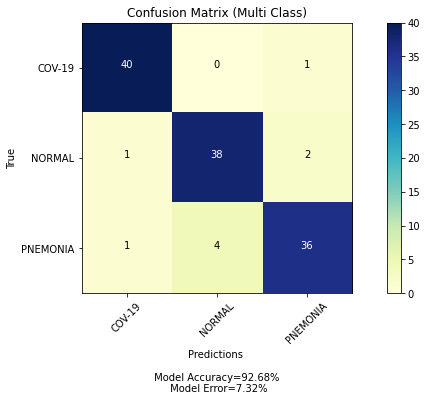

In [30]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,5))
plot_confusion_matrix(conf_mat, classes=target_names,
                      title='Confusion Matrix (Multi Class)',cmap="YlGnBu")
plt.ylabel('True')
plt.xlabel('Predictions \n \n Model Accuracy={:0.2f}% \n Model Error={:0.2f}%'.format(accuracy*100, misclass*100))
plt.savefig('Confusion Matrix (Multi Class Classification.png', bbox_inches = "tight")
plt.show()

# CLASSIFICATION REPORT AND ROC CURVE

In [31]:
# Generating the classification report for the Multi Class Model
print('**************************Classification Report (Multi Class)*******************************')
print('')
print(classification_report(trueClass, predictedClass, target_names=target_names))

**************************Classification Report (Multi Class)*******************************

              precision    recall  f1-score   support

      COV-19       0.95      0.98      0.96        41
      NORMAL       0.90      0.93      0.92        41
    PNEMONIA       0.92      0.88      0.90        41

    accuracy                           0.93       123
   macro avg       0.93      0.93      0.93       123
weighted avg       0.93      0.93      0.93       123



In [32]:
# Generating Model Accuracies, Specificity and Sensitivity
total = sum(sum(conf_mat))
acc = (conf_mat[0, 0] + conf_mat[1, 1]+ conf_mat[2,2]) / total
sensitivity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1]+ conf_mat[0, 2])
specificity = conf_mat[1, 1] / (conf_mat[1, 0] + conf_mat[1, 1] + conf_mat[1, 2] )

print("***************************Model Report*************************************")
print("Model Acc: {:.4f}".format(acc))
print('')
print("Sensitivity: {:.4f}".format(sensitivity))
print('')
print("Specificity: {:.4f}".format(specificity))

***************************Model Report*************************************
Model Acc: 0.9268

Sensitivity: 0.9756

Specificity: 0.9268


<Figure size 432x288 with 0 Axes>

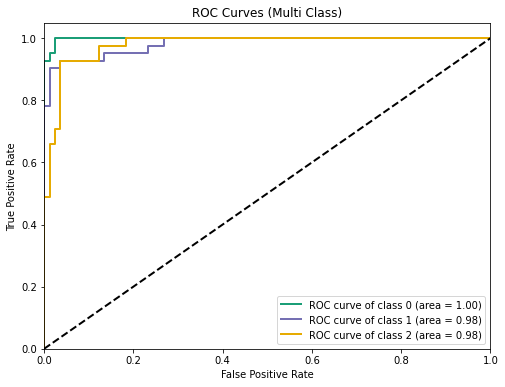

In [33]:
# Generatring the ROC curve using the Scikitplot's plot_roc method
plt.figure()
skplt.metrics.plot_roc(y_true=trueClass, y_probas=predictions, title='ROC Curves (Multi Class)', plot_micro=False, plot_macro=False,
                            classes_to_plot=None, ax=None, figsize=(8, 6), cmap='Dark2', title_fontsize='large', text_fontsize='medium')
plt.savefig('Multi_Classification_ROC.png', bbox_inches = "tight")
plt.show()

## EVALUTING MODEL ON THE CXR IMAGES

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
True Positive X-ray image of COVID-19 patient
Model Prediction :  X-ray tested positive for COV-19


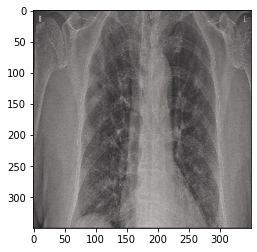

In [34]:
import cv2 #import openCV
from keras.preprocessing import image #import Keras Image Preprocessing

# Loading random images from the test data of COVID-19 set to predict
rand_image = image.load_img('/content/Multi_Class_Classfication/test/COV-19/1-s2.0-S0140673620303706-fx1_lrg.jpg', target_size = (224, 224))
rand_image = image.img_to_array(rand_image)
rand_image = np.expand_dims(rand_image, axis = 0)
image_prediction_res = cnn_model_multi.predict_classes(rand_image)

#using OpenCv and model, predicting the images.
pred_image = cv2.imread('/content/Multi_Class_Classfication/test/COV-19/1-s2.0-S0140673620303706-fx1_lrg.jpg')
print("True Positive X-ray image of COVID-19 patient")
pred_image = np.array(pred_image)
pred_image = cv2.resize(pred_image,(350,350))
plt.imshow(pred_image)
if image_prediction_res == [0]:
    diagnosis = 'X-ray tested positive for COV-19'
else:
    diagnosis = 'X-ray tested negative for COV-19'
print("Model Prediction : ",diagnosis)

True Positive X-ray image of Pneumonia patient
Model Prediction :  X-ray tested negative for COV-19


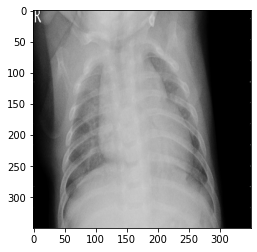

In [35]:
# Loading random images from the test data of COVID-19 set to predict
rand_image = image.load_img('/content/Multi_Class_Classfication/test/PNEMONIA/person1402_virus_2405.jpeg', target_size = (224, 224))
rand_image = image.img_to_array(rand_image)
rand_image = np.expand_dims(rand_image, axis = 0)
image_prediction_res = cnn_model_multi.predict_classes(rand_image)

#using OpenCv and model, predicting the images.
pred_image = cv2.imread('/content/Multi_Class_Classfication/test/PNEMONIA/person1402_virus_2405.jpeg')
print("True Positive X-ray image of Pneumonia patient")
pred_image = np.array(pred_image)
pred_image = cv2.resize(pred_image,(350,350))
plt.imshow(pred_image)
if image_prediction_res == [0]:
    diagnosis = 'X-ray tested positive for COV-19'
else:
    diagnosis = 'X-ray tested negative for COV-19'
print("Model Prediction : ",diagnosis)

True Positive X-ray image of Normal patient
Model Prediction :  X-ray tested negative for COV-19


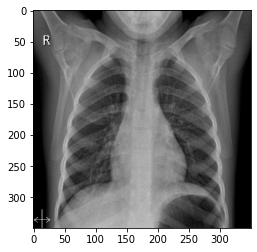

In [36]:
# Loading random images from the test data of COVID-19 set to predict
rand_image = image.load_img('/content/Multi_Class_Classfication/test/NORMAL/NORMAL2-IM-0531-0001.jpeg', target_size = (224, 224))
rand_image = image.img_to_array(rand_image)
rand_image = np.expand_dims(rand_image, axis = 0)
image_prediction_res = cnn_model_multi.predict_classes(rand_image)

#using OpenCv and model, predicting the images.
pred_image = cv2.imread('/content/Multi_Class_Classfication/test/NORMAL/NORMAL2-IM-0531-0001.jpeg')
print("True Positive X-ray image of Normal patient")
pred_image = np.array(pred_image)
pred_image = cv2.resize(pred_image,(350,350))
plt.imshow(pred_image)
if image_prediction_res == [0]:
    diagnosis = 'X-ray tested positive for COV-19'
else:
    diagnosis = 'X-ray tested negative for COV-19'
print("Model Prediction : ",diagnosis)